In [1]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime, timedelta
import os
from clustering.utils import *

In [2]:
%cd ..

/home/anuarsantoyo/PycharmProjects/master-thesis


In [23]:
beh_cols = get_behaviour_cols()
preproccesed = get_preprocessed_data(impute=True, impute_cols=beh_cols, start='2020-09-8', end='2021-02-01')

In [25]:
# Train Test Split
start_train = '2020-09-8' #originally 15 but 8 because rolling average
end_train = '2020-12-01'
df_train = preproccesed[(preproccesed.date >= start_train) & (preproccesed.date < end_train)]
df_test = preproccesed[preproccesed.date >= end_train]

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(df_train[beh_cols].to_numpy())
X_test = scaler.transform(df_test[beh_cols].to_numpy())

In [31]:
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_train)
labels_train = kmeans.labels_


In [32]:
labels_test = kmeans.predict(X_test)

In [35]:
labels = np.concatenate((labels_train,labels_test), axis=0)

In [51]:
beh_cols

['Q1_1_feel_exposed',
 'Q1_2_covid_is_threat',
 'Q2_1_easy_to_follow_advice',
 'Q2_2_can_follow_advice_if_wanted',
 'Q2_3_if_follow_advice_safe',
 'Q2_4_if_follow_advice_others_safe',
 'Q2_5_follow_advice_relationships_impared',
 'Q2_6_follow_advice_life_degraded',
 'Q3_1_aware_hand_hygiene',
 'Q3_2_avoid_contact',
 'Q3_3_ensure_frequent_cleaning',
 'Q3_4_avoid_risk_groups',
 'Q3_5_keep_distance',
 'Q3_6_avoid_crowds',
 'Q3_7_minimize_activities_w_contact',
 'Q3b_1_sneeze_sleeve',
 'Q5_1_others_took_distance',
 'Q5_2_others_follow_advice',
 'Q5_3_others_not_care_spreading',
 'Q5_4_yourself_kept_distance',
 'Q5_5_feel_urge_scold',
 'Q6_1_sanctions_are_too_harsh',
 'Q6_2_advices_important',
 'Q6_3_others_can_avoid_spreading',
 'Q6_4_advices_create_fair_burden_dristribution',
 'Q6_5_ownership_of_advice',
 'Q6_6_clear_information_on_advice_reason',
 'Q6_7_advice_limits_daily_activities',
 'Q6_8_advices_enough_for_prevention',
 'Q6_9_trust_political_strategy']

In [36]:
kmeans.cluster_centers_

array([[-0.18637027, -0.36273388, -0.53926032, -0.46741495, -0.57442229,
        -0.51787789,  0.07687142,  0.24938581, -0.56099805, -0.6694019 ,
        -0.57025468, -0.54897977, -0.68760505, -0.64987228, -0.64619299,
        -0.36536639, -0.36634484, -0.36835725, -0.01087207, -0.65768667,
        -0.19619225,  0.13347002, -0.75457901, -0.30497   , -0.55210197,
        -0.72949301, -0.69927084,  0.02737797, -0.47810011, -0.70257165],
       [ 0.10528718,  0.20492125,  0.30464731,  0.2640593 ,  0.32451155,
         0.29256761, -0.04342739, -0.1408869 ,  0.31692772,  0.3781689 ,
         0.32215712,  0.31013816,  0.38845251,  0.36713592,  0.36505736,
         0.20640845,  0.20696121,  0.20809809,  0.00614202,  0.37155055,
         0.11083597, -0.07540195,  0.42628848,  0.17228838,  0.31190201,
         0.4121165 ,  0.39504293, -0.01546678,  0.27009573,  0.39690767]])

In [37]:
preproccesed['labels'] =  labels

In [38]:
df = preproccesed

In [39]:
df = df[['date', 'labels']]

In [40]:
percentage = df.groupby('date').mean()

In [52]:
percentage_roll =  1-percentage.rolling(7).mean()

In [59]:
percentage_roll.dropna(inplace=True)

In [63]:
non_carefull = percentage_roll.reset_index('date')

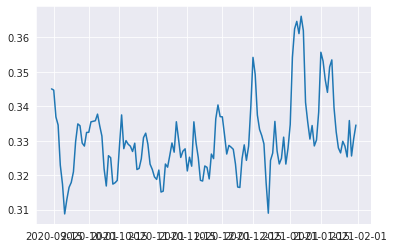

In [55]:
plt.plot(percentage_roll)

In [65]:
non_carefull.to_csv('data/modeling/group_percentage_non_careful_behavioural.csv', index=False)